# **Day2 실습에 오신것을 환영합니다**

Day 1에서 실습할 것은 간단한 지도학습(supervised learning)인 **Linear regression**과 **logistic regression**입니다.

**Linear regression**과 **logistic regression**는 둘 다 regression이지만 **Linear regression**은 train dataset의 독립변수 x와 종속변수 y의 상관관계를 모델링하여 임의의 독립변수 x를 넣었을 때의 출력(종속 변수y)를 예측하는 모델로 데이터를 잘 설명하는 선(파란색)을 찾는 것으로 볼 수 있습니다.

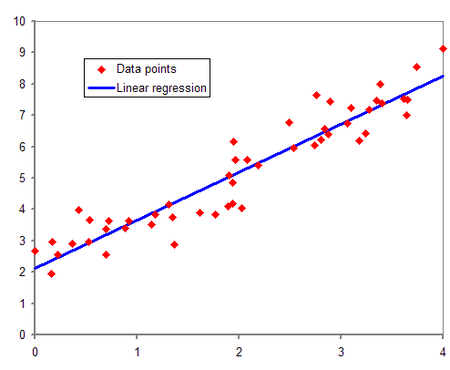

**logistic regression**은 binary classification으로 정답(y)이  **Linear regression**처럼 독립변수 x의 값을 넣었을 때 출력(종속 변수y)으로 연속적인 값이 아니라 0 또는 1로 나오는 분류 모델로 training data를 잘 구분하는 경계(초록색 선)을 찾는 것이라 생각하시면 될 것 같습니다.

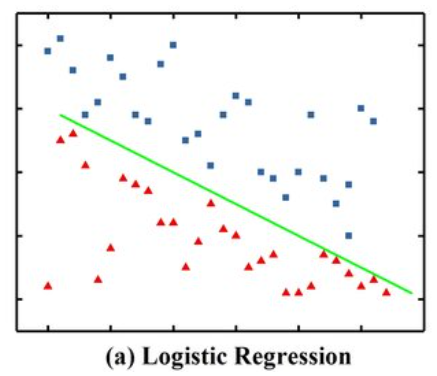

+$\alpha$)회귀(regression)라는 단어의 어원이 궁금하시다면 밑의 블로그를 참조해보시면 될 것 같습니다.

https://bit.ly/3sEGrQg

# **Linear Regression**

# Hypothesis(가설 세우기)

독립변수 x에 따른 종속변수 y의 상관관계가 선형적(직선의 분포)일 것이라는 가정을 두고 수식을 구성합니다.

$$ H(x) = Wx + b $$

In [1]:
hypothesis = x_train * W + b

NameError: ignored

#cost function
cost 함수는 가설의 결과(H(x))와 답(y)의 차이를 줄이기 위한 함수로 linear regression의 경우 MSE(mean square error loss)를 사용합니다. 

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [ ]:
cost = torch.mean((hypothesis - y_train) ** 2)

# Gradient decent

위의 cost함수로 가설의 결과(y)와 정답과의 차이가 클 수록 미분하여 back-propagation을 실행할 경우 큰 값을 기존 weight에 갱신하게 됩니다.

$\alpha$는 Learning rate로 한번 update 할때 기울기의 크기를 설정하는데 관여하게 됩니다.

$$ W := W - \alpha \frac{\partial}{\partial W} cost(W) $$

# **처음부터 끝까지 한번에 구현**


In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


gdrive와 colab을 연동시켰다면 이전 1강에서 사용하였던 gdrive에 저장한 csv 파일을 가져와 사용해봅시다.

In [4]:
import pathlib
path = pathlib.Path('/content/gdrive/My Drive/health_data.csv') 

df = pd.read_csv(path)
df = df.dropna(axis = 0).reset_index(drop=True)
height = torch.tensor(df.height)
weight = torch.tensor(df.weight)
x_train = height.view([height.shape[0],1]).float() 
y_train = weight.view([weight.shape[0],1]).float()
df.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


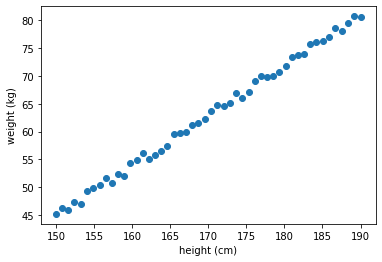

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x = x_train
y = y_train

plt.scatter(x, y)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

In [8]:
#답안 작성

# Wieght와 bias 
W = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# optimizer 설정(Parameter는 W,b이며, learnaing rate는 0.1로 시작해보고, 적당한 값을 튜닝해 보세요.)
optimizer = optim.Adam([W, b], lr=0.1)

# 경사 하강법을 반복 횟수 설정
epochs = 6000

for epoch in range(epochs + 1):
    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선을 위한 update (update 순서 : zero_grad() -> backward() -> step())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 500번마다 로그 출력
    if epoch % 500 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/6000 W: -0.088, b: 0.142 Cost: 9140.529297
Epoch  500/6000 W: 0.380, b: -1.260 Cost: 37.977673
Epoch 1000/6000 W: 0.402, b: -4.979 Cost: 34.889580
Epoch 1500/6000 W: 0.433, b: -10.238 Cost: 30.748072
Epoch 2000/6000 W: 0.472, b: -16.948 Cost: 25.846703
Epoch 2500/6000 W: 0.519, b: -24.998 Cost: 20.534182
Epoch 3000/6000 W: 0.573, b: -34.176 Cost: 15.232107
Epoch 3500/6000 W: 0.631, b: -44.127 Cost: 10.392935
Epoch 4000/6000 W: 0.691, b: -54.335 Cost: 6.412339
Epoch 4500/6000 W: 0.748, b: -64.149 Cost: 3.524597
Epoch 5000/6000 W: 0.799, b: -72.870 Cost: 1.731847
Epoch 5500/6000 W: 0.838, b: -79.430 Cost: 0.862733
Epoch 6000/6000 W: 0.862, b: -83.522 Cost: 0.529258


**[참고] optimizer의 종류는 매우 다양합니다. 우리가 풀고자 하는 문제에 맞는 optimizer를 찾아서 선택해주세요.**

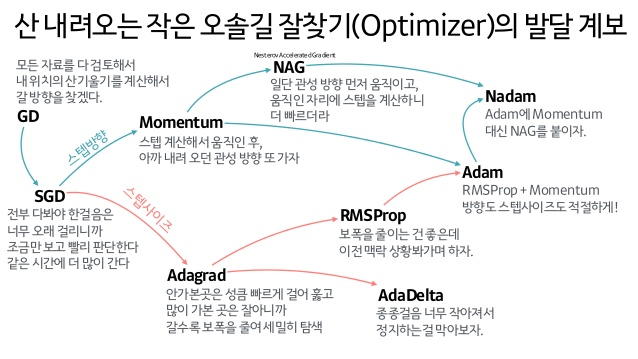

출처: 하용호, 자습해도 모르겠던 딥러닝, 머리속에 인스톨 시켜드립니다

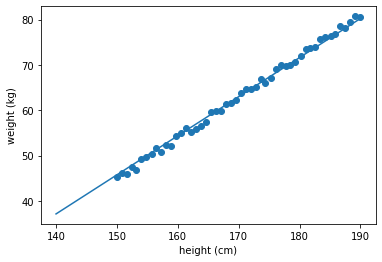

In [9]:
# 직선 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = x_train
y = y_train

plt.scatter(x, y)

t = np.arange(140.,190.,0.001)

plt.plot(t, W.item()*t+b.item())
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

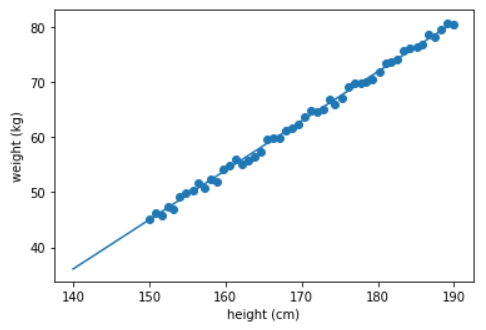

위와 같은 직선을 찾으셨다면 성공적으로 알고리즘을 구성하신 것입니다.



---




# **Logistic Regression**

**Logistic regression**은 데이터를 두 개의 그룹으로 분류하는 문제에서 가장 기본적인 방법입니다. 위에서 배운 **Linear regression**에서는 우리가 원하는 것이 예측값(실수)이기 때문에 종속변수의 범위가 실수이지만 **Logistic regression**에서는 종속변수 y 값이 0 또는 1을 갖습니다. 그래서 우리는 주어진 데이터를 분류할 때 0인지 1인지 예측하는 모델을 만들어야 합니다.


우리는 0과 1을 분류하는 분류기를 만들고 싶습니다. 그러려면 y값이 0인 dataset과 y가 1인 dataset의 경계에서는 급격하게 구분짓는 함수가 필요하게 됩니다. 정성적으로는 이렇게 표현이 되지만 실제적으로 구현하기 위해서는 수식을 사용해야 하기 때문에 **sigmoid**라는 함수를 도입하게 됩니다.

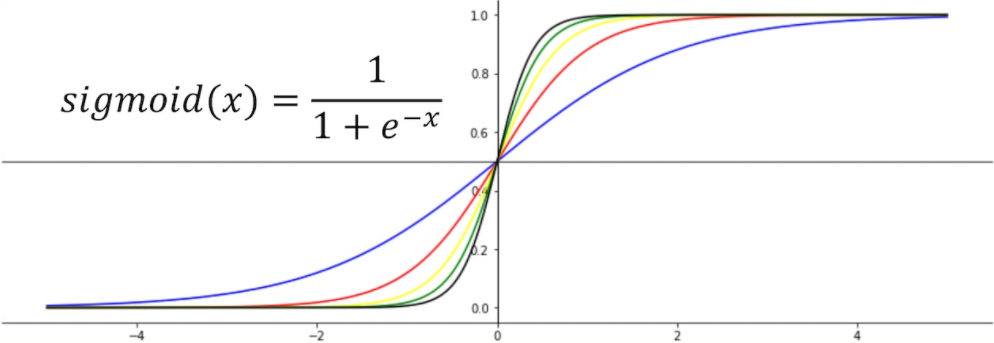

**sigmoid function**


$$ sigmoid(z) = \frac{1}{1+e^{-z}} $$

sigmoid 함수는 z의 값에 따라서 위의 그림처럼 기울기가 다양해집니다. $$z = a x$$라고 할 때 a의 값이 커질수록 위의 검은색 그래프처럼 기울기가 가파르게 되어 step function(계단모양의 함수)에 가깝게 됩니다.

+$\alpha$)추가적으로 sigmoid 함수를 왜 쓰는지에 대해 수학적으로 조금 더 알고싶다면 하단의 링크를 들어가서 확인해보시기 바랍니다.

https://icim.nims.re.kr/post/easyMath/64

# Hypothesis

$$ H(X) = \frac{1}{1+e^{-W^T X}} $$

$$ z = -W^T X $$ 

y는 선형적인 형태의 식이지만 linear regression과 달리 독립변수 x의 값이 1차원이 아닐 수 있기 때문에 기울기(W)와 data(x)는 내적의 형태가 됩니다.

In [10]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [11]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [12]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))


# Cost function



$$ cost(W) = -\frac{1}{m} \sum y \log\left(H(x)\right) + (1-y) \left( \log(1-H(x) \right) $$

**Linear regression**의 경우는 **MSE**를 이용하여 loss를 구한 반면 **logistic regression**은 **binary cross-entropy**를 이용하여 loss를 구하게 됩니다.


cost function의 목적은 답안에 해당하는 y(0 또는 1)와 sigmoid 함수를 통해 예측한 값인 H(x)간의 차이를 줄이는 것이기 때문에 y가 1일때 H(x)가 0에 가까운 값이 나온다면 log(H(x))는 -무한대에 해당하는 값이 나오며, y가 0일때 H(x)가 1에 가까운 값이 나오면 log(1-H(x))는 -무한대의 결과가 나오기 때문에 답과 거리가 먼 결과가 나올 경우 gradient descent를 통해 update를 하는 경우 큰 기울기로 update를 하게됩니다.


+$\alpha$)정성적인 설명을 하였지만 수학적인 근거를 알고싶다면 하단의 링크를 확인해보세요.

https://curt-park.github.io/2018-09-19/loss-cross-entropy/

+$\alpha$)logistic regression에서 MSE를 cost function으로 사용하면 안되는 자세한 이유가 궁금하시다면 하단의 링크를 참조하시면 됩니다.

https://bit.ly/2M1dU6T

In [13]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))

In [14]:
cost = losses.mean()

# Gradient decent

위의 cost함수로 가설의 결과(y)와 정답과의 차이가 클 수록 미분하여 back-propagation을 실행할 경우 큰 값을 기존 weight에 갱신하게 됩니다.

$\alpha$는 Learning rate로 한번 update 할때 기울기의 크기를 설정하는데 관여하게 됩니다.

$$ W := W - \alpha \frac{\partial}{\partial W} cost(W) $$

# **처음부터 끝까지 한번에 구현**


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [16]:
x_data = [[1, -4], [1, 2], [2, 3], [3, 1],[4, -2], [4, 3], [5, 3], [6, 2], [3, 8], [6, -2]]
y_data = [[0], [0], [0], [0], [0], [1], [1], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [19]:
#답안 작성

# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정(Parameter는 W,b이며, learnaing rate는 적당한 값을 입력하세요.)
optimizer = optim.Adam([W, b], lr=0.1)

# 경사 하강법을 반복 횟수 설정
nb_epochs = 1000

for epoch in range(nb_epochs + 1):

    #hypothesis 계산
    hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

    # Cost 계산
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선을 위한 update (update 순서 : zero_grad() -> backward() -> step())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 update결과 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.120562
Epoch  200/1000 Cost: 0.058586
Epoch  300/1000 Cost: 0.035842
Epoch  400/1000 Cost: 0.024595
Epoch  500/1000 Cost: 0.018098
Epoch  600/1000 Cost: 0.013958
Epoch  700/1000 Cost: 0.011136
Epoch  800/1000 Cost: 0.009114
Epoch  900/1000 Cost: 0.007609
Epoch 1000/1000 Cost: 0.006455


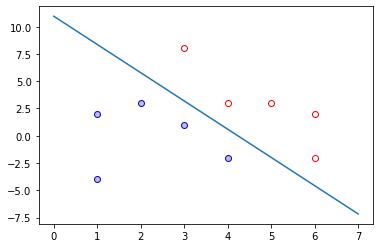

In [20]:
# Cost가 0.02 이하로 작아질 경우 학습이 잘 된것으로 볼 수 있습니다.
# classifier가 잘 학습되었는지 시각화 합니다. 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = x_train
y = y_train

W_x = W[0][0].detach().numpy()
W_y = W[1][0].detach().numpy()
b = b.detach().numpy()

for i in range(len(x_data)):
  if y_data[i][0]:
    plt.scatter(x_data[i][0], x_data[i][1], color='1', edgecolor="r")
  else:
    plt.scatter(x_data[i][0], x_data[i][1], color='0.75', edgecolor="b")

t = np.arange(0.,7.,0.001)
plt.plot(t, -(W_x/W_y)*t- b/W_y)
plt.show()

아래와 같이 데이터의 y값(0 또는 1)에 따라 분리하는 직선을 찾으셨다면 성공적으로 실습을 완료하신 것입니다.

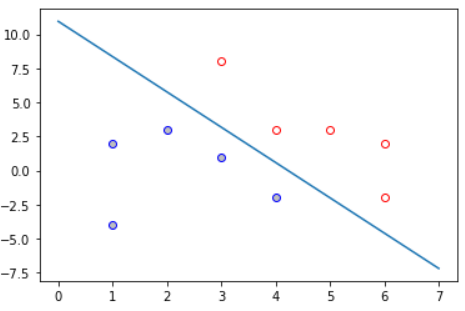

**수고하셨습니다**